<a href="https://colab.research.google.com/github/aiswaryam2005/Fire-Detection-System/blob/main/IVA_MINI_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow opencv-python

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Paths to your dataset directories
train_dir = '/content/drive/MyDrive/archive (7)/data/data/img_data/train'  # Replace with the path to your training dataset
val_dir = '/content/drive/MyDrive/archive (7)/data/data/img_data/test'      # Replace with the path to your validation dataset

# Hyperparameters
img_size = (224, 224)  # Input image size for MobileNetV2
batch_size = 32
epochs = 10  # Number of training epochs, adjust based on your needs

# Data augmentation and preprocessing using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    rotation_range=40,         # Randomly rotate images
    width_shift_range=0.2,     # Horizontal shifting
    height_shift_range=0.2,    # Vertical shifting
    shear_range=0.2,           # Shearing
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Horizontal flip
    fill_mode='nearest'        # Fill any pixels newly created by shifting
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only normalization for validation data

# Load and preprocess the training and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # Binary classification (fire or no fire)
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Load the base pre-trained MobileNetV2 model (without the top layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adding custom layers for fire detection
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1, activation='sigmoid')(x)  # Final layer for binary classification

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Save the model after training
model.save('fire_detection_mobilenetv2.h5')  # Save the trained model for future use

Found 1052 images belonging to 3 classes.
Found 171 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 328s 9s/step - accuracy: 0.4259 - loss: -0.5370 - val_accuracy: 0.6313 - val_loss: 0.3366
Epoch 2/10
 1/32 ━━━━━━━━━━━━━━━━━━━━ 4:28 9s/step - accuracy: 0.2812 - loss: -4.6633

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.2812 - loss: -4.6633 - val_accuracy: 0.5455 - val_loss: -3.2314
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 285s 8s/step - accuracy: 0.4048 - loss: -7.3867 - val_accuracy: 0.3250 - val_loss: 30.8171
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 191ms/step - accuracy: 0.2188 - loss: -15.5446 - val_accuracy: 0.4545 - val_loss: 34.5131
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 310s 8s/step - accuracy: 0.2645 - loss: -17.5056 - val_accuracy: 0.3250 - val_loss: 46.3459
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.3125 - loss: -22.9839 - val_accuracy: 0.4545 - val_loss: 85.6095
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 309s 8s/step - accuracy: 0.3884 - loss: -23.0611 - val_accuracy: 0.3250 - val_loss: 62.4210
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.2500 - loss: -27.3981 - val_accuracy: 0.4545 - val_loss: 72.8747
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 268s 8s/step - accuracy: 0.4002 - loss: -28.1799 - val_accura

In [ ]:
test_dataset = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (7)/data/data/img_data/test',  # Replace with the actual path to your test data
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 171 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.2131 - loss: 139.9817
Test Accuracy: 33.33%
Test loss: 6671.42%


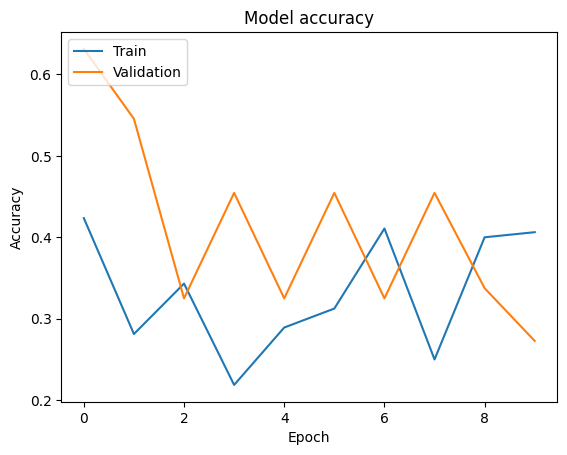

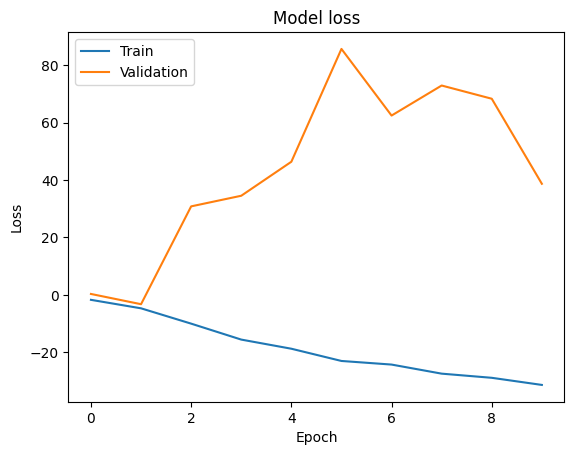

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test loss: {test_loss * 100:.2f}%")

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Fire detected! Confidence: 1.0


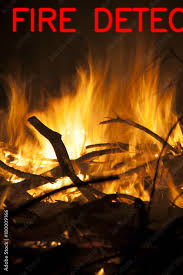

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Fire detected! Confidence: 1.0


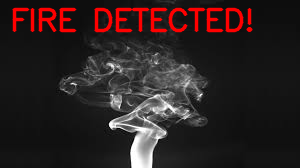

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import smtplib
from google.colab.patches import cv2_imshow

# Load the pre-trained fire detection model (You need to train a model beforehand)
model = tf.keras.models.load_model('fire_detection_mobilenetv2.h5')

# Compile the model to avoid the warning and ensure proper evaluation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



def process_image(image_path):
    # Load the image
    frame = cv2.imread(image_path)

    # Preprocess the image for model input
    processed_frame = cv2.resize(frame, (224, 224))  # Resize to model's input size
    processed_frame = processed_frame / 255.0  # Normalize the pixel values
    processed_frame = np.expand_dims(processed_frame, axis=0)  # Add batch dimension

    # Predict using the model
    prediction = model.predict(processed_frame)

    # If fire is detected with confidence above 80%, trigger an alert
    if prediction[0][0] > 0.8:
        print("Fire detected! Confidence:", prediction[0][0])
        cv2.putText(frame, "FIRE DETECTED!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    else:
        cv2.putText(frame, "No Fire", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the image with detection results
    cv2_imshow(frame)

# Example of predicting fire in an image
image_path = '/content/drive/MyDrive/fire image.jpeg'  # Replace with the actual image path
process_image(image_path)
image_path = '/content/drive/MyDrive/smoke image.jpeg'  # Replace with the actual image path
process_image(image_path)